In [10]:
import os

models_path = os.environ["DATA"] + "/03_paper_popalg/03_CLScore_opt/v2/04.03_pop_1000_CLScore_opt_from_methane/"

                
size = (300, 170)

In [83]:
import csv
from os.path import join
import pandas as pd
import numpy as np
from rdkit.Chem.Draw import MolsToGridImage, MolToImage
from rdkit.Chem import MolFromSmiles
import cv2
from PIL import Image


def random_idx(pop_df):

    ids = np.arange(len(pop_df["total"]))
    np.random.shuffle(ids)
    
    return ids[:3]
    
    
    
    

def extract_random_mol_imgs(model_path, name):
    
    mol_imgs = []
    
    all_exec_ids = np.arange(1, 11)
    np.random.shuffle(all_exec_ids)
    ids = list(all_exec_ids[:1])

    for id_exec in ids:
        pop_df = pd.read_csv(join(model_path, str(id_exec), "pop.csv"))
        
        mol_ids = random_idx(pop_df)
        for mol_idx in mol_ids:
        
            smi = pop_df["smiles"][mol_idx]
            score = "{:.3f}".format(pop_df["total"][mol_idx])
            img = MolToImage(MolFromSmiles(smi), size=size, legend=name + " : " +score)
            mol_imgs.append(img)
        
    return [mol_imgs]


def get_concat_h(im1, im2):
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

def get_concat_v(im1, im2):
    dst = Image.new('RGB', (im1.width, im1.height + im2.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (0, im1.height))
    return dst

def gen_figure(models_path, size):
    
    img_list = []
            
    curr_model_imgs = extract_random_mol_imgs(models_path, 'CLScore')
    img_list.extend(curr_model_imgs)
        

    T_img_list = [[] for i in range(3)]
    for i in range(len(img_list)):
        for j in range(len(img_list[i])):
            T_img_list[j].append(img_list[i][j])
    
#     T_img_list = img_list
    
    
    v_concat_img = []
    for imgs_prop in T_img_list:
        for i in range(len(imgs_prop)):
            if i == 0:
                complete_img = imgs_prop[0]
            else: 
                complete_img = get_concat_v(complete_img, imgs_prop[i])
        v_concat_img.append(complete_img) 
        
    for i in range(len(v_concat_img)):
        if i == 0:
            complete_img = v_concat_img[0]
        else:
            print(i)
            complete_img = get_concat_h(complete_img, v_concat_img[i])
    
    return complete_img

1
2


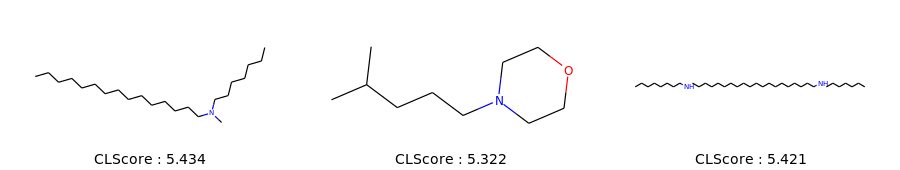

In [84]:
gen_figure(models_path, size)

In [4]:
from chempopalg.molgraphops.molgraph import MolGraph
from rdkit.Chem import MolFromSmiles
from rdkit.Chem.Draw import MolToImage
from IPython.display import Image 

def draw(smi, size):
    display(MolToImage(MolFromSmiles(smi), size=size))